In [31]:
import numpy as np
import matplotlib.pyplot as plt

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

# Define simulation parameters
n = 270
N = 1024
k = 40
sigma = 0.05
s = 0.2
lambda_ = 0.1
num_iterations = 150

In [72]:
# create A, x, y, w
# Generate matrix A
# SD * random array of size nxN
A = np.sqrt(1/n)*np.random.randn(n, N)
#B = np.sqrt(1/n)*np.random.randn(n, N)

# Track MSE vs iterations
#array of zeros the size of the iterations
mse_vs_iterations = np.zeros(num_iterations)
mse_vs_iterationsA = np.zeros(num_iterations)
mse_vs_iterationsB = np.zeros(num_iterations)

# Generate sparse vector x
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
non_zero_entries = np.random.randint(10, size=(k, 1))+1
x[idx_nonzero_entries] = 1

# Generate noise vector w
# converts it to a column vector. nX1
w = sigma*np.random.randn(n).reshape(-1, 1)
w1 = sigma*np.random.randn(n).reshape(-1,1)

# Generate measurement vector y - note that a @ b is equal to np.matmul(a, b)
y = A @ x + w 
yb = A @ x + w1

#y = np.vstack((ya, yb))
#print(y.shape)
#A = np.vstack((A,A))
#print(A.shape)

# Prep for IST/AMP
z = np.zeros(y.shape)

xHt = np.zeros(x.shape)

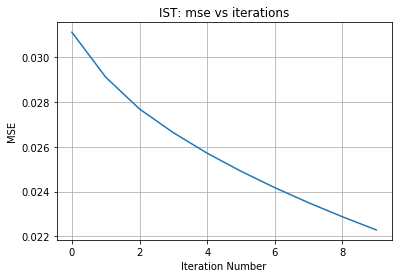

[0.03111047 0.02910428 0.02768448 0.02662735 0.02571238 0.02490566
 0.02417386 0.02350011 0.02287408 0.02228793]


In [73]:
num_iterations = 10
mse_vs_iter = np.zeros(num_iterations)
for i in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s* A.T @ z
    xHt = eta(r, s*lambda_)
    err_sum = np.sum((x-xHt)**2)
    mse_vs_iter[i] = (1/N) * err_sum
        
# Plot results
plt.figure()
plt.plot(range(num_iterations), mse_vs_iter)
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("IST: mse vs iterations")
plt.show()
print(mse_vs_iter)

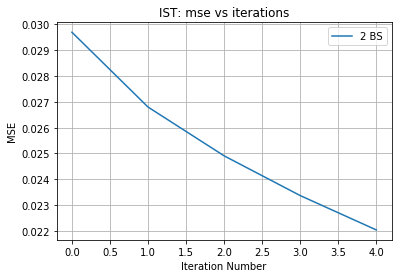

min of 2 BS =  0.022038595314383735
[0.02969787 0.02679966 0.0249094  0.02336962 0.0220386 ]


In [74]:
# benchmark IST for n = 250
# 150 iterations
A = np.sqrt(1/n)*np.random.randn(n, N)
# Generate sparse vector x
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
x[idx_nonzero_entries] = 1

# Generate noise vector w
# converts it to a column vector. nX1
w = sigma*np.random.randn(n).reshape(-1, 1)
w1 = sigma*np.random.randn(n).reshape(-1,1)

# Generate measurement vector y - note that a @ b is equal to np.matmul(a, b)
ya = A @ x + w 
yb = A @ x + w1

# Prep for IST/AMP
z = np.zeros(y.shape)

xHt = np.zeros(x.shape)

num_iterations = 5
# MSE vs iterations
mse_vs_iter1 = np.zeros(num_iterations)
mse_vs_iter2 = []
for idx_iter in range(num_iterations): # //2 if appending to mse_vs_iter2
    za = ya - A @ xHt
    r = xHt + s * A.T @ za
    xHt = eta(r, s*lambda_)
# find the current error
    err_sum1 = np.sum((x - xHt)**2)
   # mse_vs_iterationsA[idx_iter] = (1/N) * err_sum1
    #mse_vs_iter2.append(err_sum1/N)
    
# do the same for second vector
    zb = yb - A @ xHt
    r = xHt + s * A.T @ zb
    xHt = eta(r, s*lambda_)
# find the current error
    err_sum2 = np.sum((x - xHt)**2)
   # mse_vs_iterationsB[idx_iter] = (1/N) * err_sum2    
    
    mse_vs_iter1[idx_iter] = (1/(2*N)) * (err_sum1 +  err_sum2)
    #mse_vs_iter2.append(err_sum2/N)
    
#for i in range(num_iterations):
    #mse_vs_iterations[i] = (1/2)*(mse_vs_iterationsA[i] + mse_vs_iterationsB[i])
    
# Plot results
plt.figure()
#plt.plot(range(num_iterations), mse_vs_iterations)
plt.plot(range(num_iterations), mse_vs_iter1, label="2 BS")
#plt.plot(range(num_iterations), mse_vs_iter, label="1 BS")
plt.legend()
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("IST: mse vs iterations")
plt.show()
print("min of 2 BS = ", min(mse_vs_iter1))
print(mse_vs_iter1)

In [76]:
diff = [mse_vs_iter1[0] - mse_vs_iter[1], mse_vs_iter1[1] - mse_vs_iter[3], mse_vs_iter1[2] - mse_vs_iter[5],
        mse_vs_iter1[3] - mse_vs_iter[7], mse_vs_iter1[4] - mse_vs_iter[9]]
print(diff)

new_ar = [mse_vs_iter[1],mse_vs_iter[3],mse_vs_iter[5],mse_vs_iter[7],mse_vs_iter[9]]

[0.0005935844456393113, 0.00017231268111225773, 3.7399947400221234e-06, -0.00013048959449631775, -0.0002493396710882799]


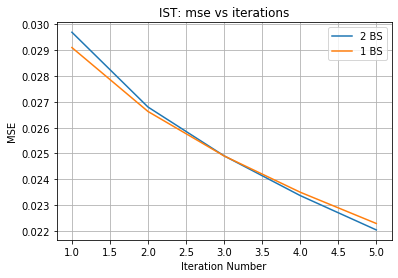

In [77]:
plt.figure()
#plt.plot(range(num_iterations), mse_vs_iterations)
plt.plot(range(1,6), mse_vs_iter1, label="2 BS")
plt.plot(range(1,6), new_ar, label="1 BS")
plt.legend()
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("IST: mse vs iterations")
plt.show()
print()

In [ ]:
# SD * random array of size nxN
A = np.sqrt(1/n)*np.random.randn(n, N)

# Track MSE vs iterations
#array of zeros the size of the iterations
mse_vs_iterations = np.zeros(num_iterations)

# Generate sparse vector x
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
non_zero_entries = np.random.randint(10, size=(k, 1))+1
x[idx_nonzero_entries] = non_zero_entries

#---------------------------------------------------#
# stuff for one base station

#array of zeros the size of the iterations
mse_vs_iterations1 = np.zeros(num_iterations)

# Generate noise vector w
# converts it to a column vector. nX1
w = sigma*np.random.randn(n).reshape(-1, 1)

# Generate measurement vector y - note that a @ b is equal to np.matmul(a, b)
y = A @ x + w 

# Prep for IST/AMP
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)
# MSE vs iterations
for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, s*lambda_)
# find the current error
    err_sum1 = np.sum((x - xHt)**2)
    mse_vs_iterations1[idx_iter] = (1/N) * err_sum1
    

#----------------------------------------------------#
#stuff for two base stations
# Generate noise vector w
# converts it to a column vector. nX1
w1 = sigma*np.random.randn(n).reshape(-1, 1)
w2 = sigma*np.random.randn(n).reshape(-1, 1)

# Generate measurement vector y - note that a @ b is equal to np.matmul(a, b)
y1 = A @ x + w1 
y2 = A @ x + w2

# Prep for IST/AMP
z1 = np.zeros(y1.shape)
xHt1 = np.zeros(x.shape)
z2 = np.zeros(y2.shape)
xHt2 = np.zeros(x.shape)

for idx_iter in range(num_iterations):
    z1 = y1 - A @ xHt1
    r1 = xHt1 + s * A.T @ z1
    xHt1 = eta(r1, s*lambda_)
# same thing for BS 2
    z2 = y2 - A @ xHt2
    r2 = xHt2 + s * A.T @ z2
    xHt2 = eta(r2, s*lambda_)
#find avg xHt
    xHt_av = (1/2)*(xHt1 + xHt2)
# find the current error
    err_sum = np.sum((x - xHt_av)**2)
    mse_vs_iterations[idx_iter] = (1/N) * err_sum
    
# Plot results
plt.figure()
plt.plot(range(num_iterations), mse_vs_iterations, label="Two BS")
plt.plot(range(num_iterations), mse_vs_iterations1, label="One BS")
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("Two Base Stations")
plt.legend()
plt.show()
#try avg the y's and then running IST
# BER vs SNR as well